In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cata Dataset from Kaggle

In [ ]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats

 98% 797M/812M [00:05<00:00, 207MB/s]
100% 812M/812M [00:05<00:00, 160MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extract")

The dataset is extract


In [ ]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The test dataset is extracted")

The test dataset is extracted


In [ ]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The train dataset is extract")

The train dataset is extract


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images:", file_count)

Number of images: 25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.6185.jpg', 'cat.5929.jpg', 'cat.3803.jpg', 'dog.8923.jpg', 'dog.6898.jpg', 'cat.10356.jpg', 'dog.2012.jpg', 'dog.10789.jpg', 'dog.2276.jpg', 'dog.3376.jpg', 'cat.5083.jpg', 'dog.3776.jpg', 'cat.12295.jpg', 'dog.9834.jpg', 'cat.8546.jpg', 'dog.3933.jpg', 'cat.10149.jpg', 'dog.11095.jpg', 'dog.7818.jpg', 'cat.11228.jpg', 'dog.12430.jpg', 'cat.9339.jpg', 'cat.893.jpg', 'cat.11705.jpg', 'dog.6562.jpg', 'cat.9455.jpg', 'cat.579.jpg', 'dog.10297.jpg', 'dog.385.jpg', 'dog.8928.jpg', 'cat.12090.jpg', 'cat.5582.jpg', 'cat.522.jpg', 'cat.7265.jpg', 'cat.7440.jpg', 'cat.8688.jpg', 'cat.6088.jpg', 'cat.2188.jpg', 'cat.3305.jpg', 'cat.4185.jpg', 'dog.7855.jpg', 'cat.9665.jpg', 'dog.3813.jpg', 'cat.5378.jpg', 'dog.469.jpg', 'cat.4628.jpg', 'dog.2099.jpg', 'cat.4140.jpg', 'dog.5919.jpg', 'cat.8021.jpg', 'cat.12020.jpg', 'cat.352.jpg', 'dog.8803.jpg', 'cat.8419.jpg', 'dog.7730.jpg', 'dog.12210.jpg', 'dog.8354.jpg', 'dog.3464.jpg', 'dog.11488.jpg', 'dog.8999.jpg', 'cat.2904.jpg', 'cat.966.jpg', '

Importing the dependencies 

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying images of dogs and cats

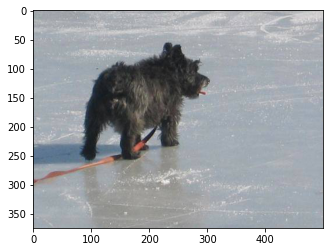

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.10085.jpg')
img_plot = plt.imshow(img)
plt.show()

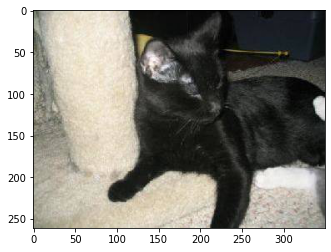

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4249.jpg')
img_plot = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


dog
cat
cat
dog
dog


In [ ]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Number of dog images: ", dog_count)
print("Number of cat images: ", cat_count)

Number of dog images:  12500
Number of cat images:  12500


Resizing all the images 

In [ ]:
# creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

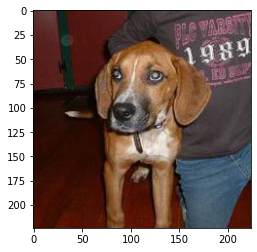

In [ ]:
# display resize dog image
img = mpimg.imread('/content/image resized/dog.8923.jpg')
img_plot = plt.imshow(img)
plt.show()

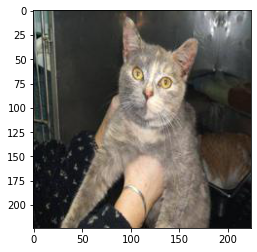

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.5949.jpg')
img_plot = plt.imshow(img)
plt.show()

Creating labels for resized image of dogs and cats

Cat --> 0

Dog --> 1

In [ ]:
# creating a for loop to assign labels
filenames = os.listdir("/content/image resized/")

labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == "dog":
    labels.append(1)
  
  else:
    labels.append(0)


In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.6185.jpg', 'cat.5929.jpg', 'cat.3803.jpg', 'dog.8923.jpg', 'dog.6898.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 1]
2000


In [ ]:
print(labels.count(1))
print(labels.count(0))

972
1028


In [ ]:
values, counts = np.unique(labels, return_counts=True)
print(values, counts)

[0 1] [1028  972]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory ='/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory+"*."+e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
dog_cat_images

array([[[[145, 171, 141],
         [147, 173, 143],
         [150, 176, 146],
         ...,
         [ 43,  92,  94],
         [ 39,  88,  90],
         [ 36,  85,  87]],

        [[151, 177, 147],
         [150, 176, 146],
         [149, 175, 145],
         ...,
         [ 44,  93,  95],
         [ 43,  92,  94],
         [ 41,  90,  92]],

        [[155, 181, 151],
         [152, 178, 148],
         [146, 174, 144],
         ...,
         [ 45,  94,  96],
         [ 46,  95,  97],
         [ 46,  95,  97]],

        ...,

        [[ 32,  62,  43],
         [ 31,  61,  42],
         [ 32,  60,  41],
         ...,
         [ 11,  25,  19],
         [ 11,  25,  19],
         [ 11,  25,  19]],

        [[ 33,  63,  44],
         [ 32,  62,  43],
         [ 33,  61,  42],
         ...,
         [  9,  23,  17],
         [  9,  23,  17],
         [  9,  23,  17]],

        [[ 36,  66,  47],
         [ 34,  64,  45],
         [ 34,  62,  43],
         ...,
         [  7,  21,  15],
        

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
x = dog_cat_images
y = np.asarray(labels)

**Train Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
x_test

array([[[[ 26,  46,  77],
         [ 29,  49,  80],
         [ 32,  51,  84],
         ...,
         [144, 147, 168],
         [ 78,  83, 104],
         [113, 118, 139]],

        [[ 27,  48,  79],
         [ 29,  50,  81],
         [ 32,  53,  85],
         ...,
         [152, 157, 178],
         [ 97, 102, 123],
         [142, 149, 169]],

        [[ 25,  51,  81],
         [ 27,  53,  83],
         [ 30,  56,  86],
         ...,
         [133, 140, 159],
         [ 97, 104, 123],
         [155, 165, 183]],

        ...,

        [[ 88,  84,  66],
         [ 85,  82,  67],
         [ 94,  93,  79],
         ...,
         [109, 101,  88],
         [112, 104,  91],
         [111, 103,  90]],

        [[112, 104,  81],
         [104,  98,  75],
         [101,  96,  75],
         ...,
         [103,  95,  82],
         [106,  98,  85],
         [103,  95,  82]],

        [[101,  92,  65],
         [105,  96,  69],
         [106,  98,  75],
         ...,
         [103,  95,  82],
        

In [ ]:
#scalling the data
x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [ ]:
print(x_train_scaled)

[[[[0.39215686 0.38823529 0.37254902]
   [0.39215686 0.38823529 0.37254902]
   [0.4        0.39607843 0.38039216]
   ...
   [0.74509804 0.75686275 0.77647059]
   [0.74901961 0.74901961 0.77254902]
   [0.74901961 0.74901961 0.77254902]]

  [[0.39215686 0.38823529 0.37254902]
   [0.38823529 0.38431373 0.36862745]
   [0.39215686 0.38823529 0.37254902]
   ...
   [0.74509804 0.75686275 0.77647059]
   [0.74901961 0.74901961 0.77254902]
   [0.74901961 0.74901961 0.77254902]]

  [[0.38823529 0.38431373 0.36862745]
   [0.38039216 0.37647059 0.36078431]
   [0.38039216 0.37647059 0.36078431]
   ...
   [0.74509804 0.75686275 0.77647059]
   [0.74117647 0.75294118 0.77254902]
   [0.74117647 0.75294118 0.77254902]]

  ...

  [[0.31372549 0.44705882 0.5372549 ]
   [0.31764706 0.45098039 0.54117647]
   [0.32156863 0.45490196 0.54509804]
   ...
   [0.54901961 0.66666667 0.70980392]
   [0.56470588 0.6745098  0.71764706]
   [0.56470588 0.6745098  0.71764706]]

  [[0.31764706 0.45098039 0.54117647]
   [0.3

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model, 
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 38s 694ms/step - loss: 0.1658 - acc: 0.9294
Epoch 2/5
50/50 [==============================] - 38s 772ms/step - loss: 0.0675 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 36s 704ms/step - loss: 0.0509 - acc: 0.9831
Epoch 4/5
50/50 [==============================] - 35s 692ms/step - loss: 0.0387 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 39s 791ms/step - loss: 0.0307 - acc: 0.9937


In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', round(acc*100, 2))

13/13 [==============================] - 9s 672ms/step - loss: 0.0598 - acc: 0.9825
Test Loss = 0.059813518077135086
Test Accuracy = 98.25


Predicting model 

Path of the image to be predicted: /content/dogimage.png


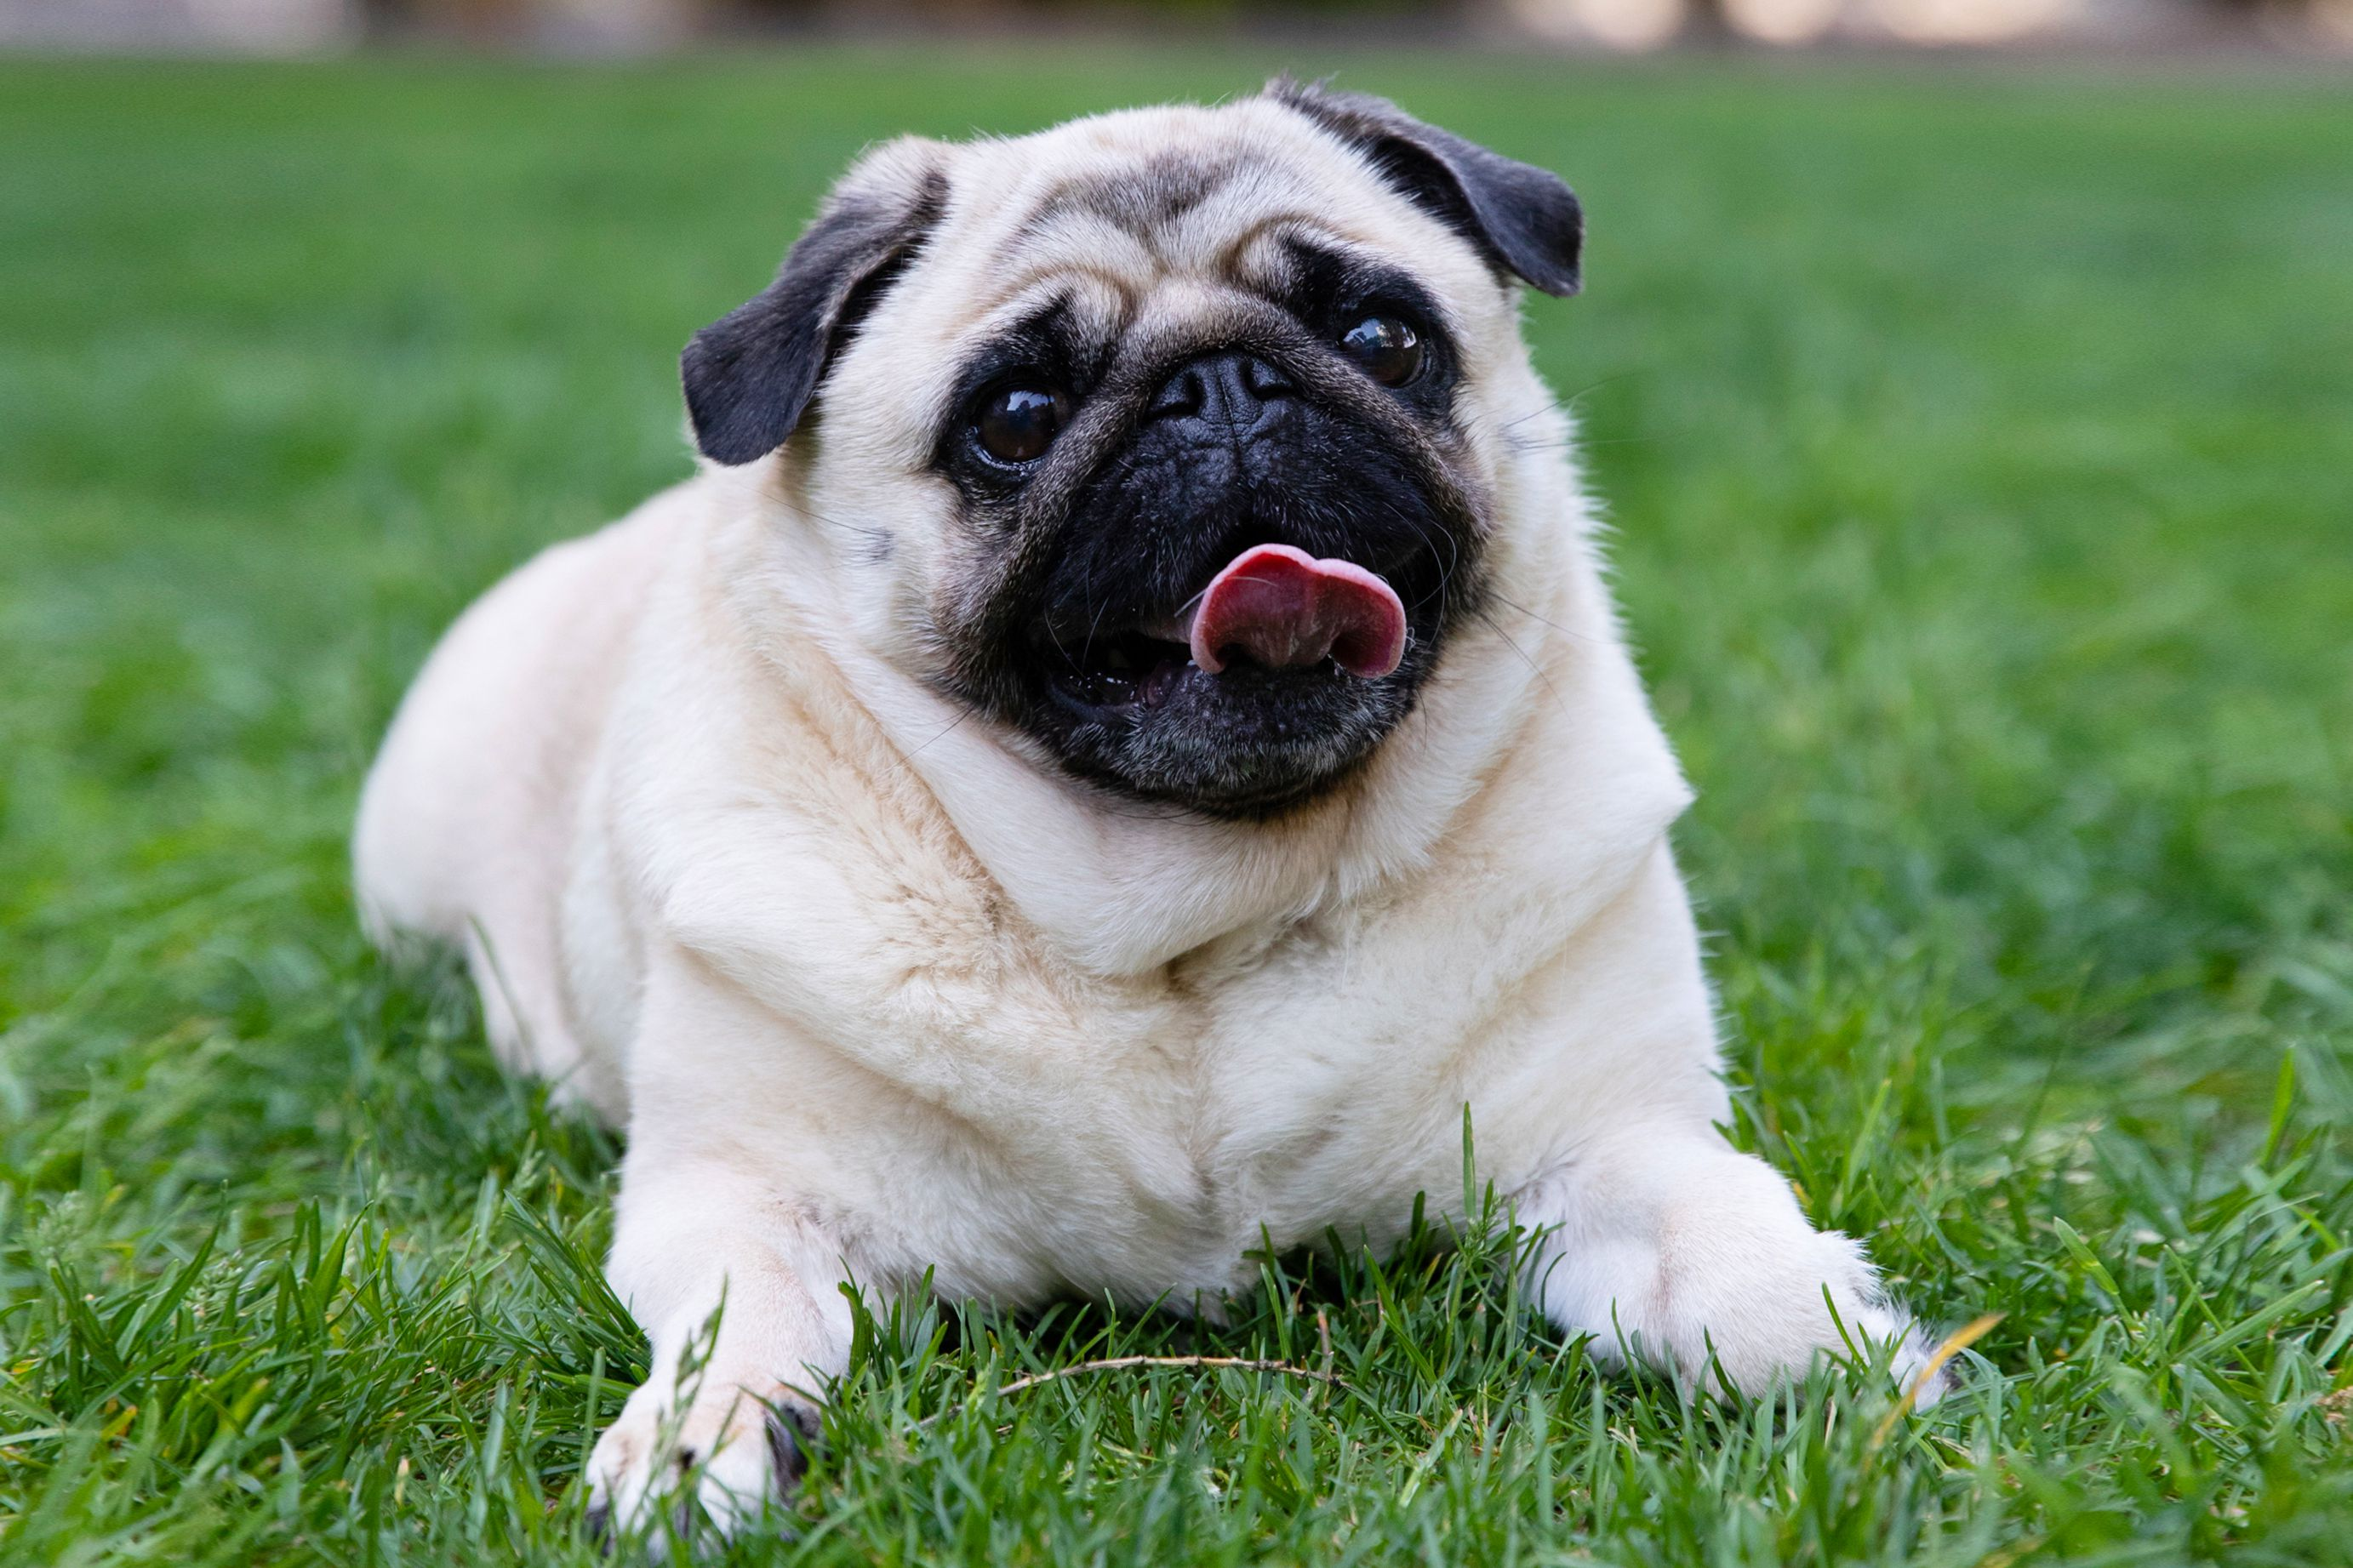

1/1 [==============================] - 1s 641ms/step
[[-1.7064527  1.9083202]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/catimage.png


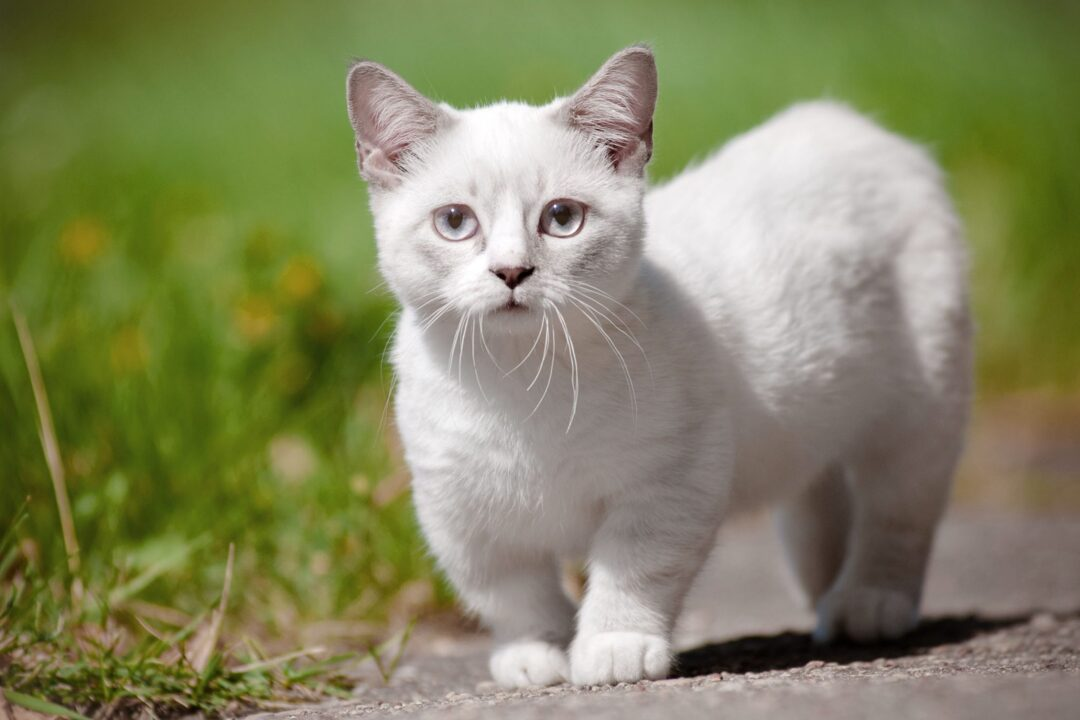

1/1 [==============================] - 0s 55ms/step
[[ 4.260058  -3.8159459]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')